In [19]:
import numpy 
import time #para calcular tiempos
import scipy.special #para la funcion sigmoide
import matplotlib.pyplot as plt #para representar las gráficas
#para asegurarnos de que las gráficas estan en este cuaderno y no una ventana externa
%matplotlib inline 


In [20]:
#definicion de la clase 
class neuralNetwork:
    #inicialización de la red neuronal
    def __init__(self,nodosent,nodosocu,nodossal,aprendizaje):
        #establecemos el numero de nodos para la capa de entrada, la oculta y la de salida (e,o,s respectivamente)
        self.enodos=nodosent
        self.onodos=nodosocu
        self.snodos=nodossal
        
        #matrices de peso peo (peso entrada coulta), pos (peso oculta salida)
        self.weo=numpy.random.normal(0.0, pow(self.onodos, -0.5),(self.onodos, self.enodos))
        self.wos = numpy.random.normal(0.0, pow(self.snodos, -0.5),(self.snodos, self.onodos))

        #tasa de aprendizaje
        self.ta=aprendizaje
        
        #función de activación (sigmoide)
        self.activacion_funcion= lambda x: scipy.special.expit(x)
        
        pass
        
    #funcion entrenamiento
    def entrena(self, lista_entrada, lista_objetivo):
        #convertimos las entradas y los objetivos en un array de 2 dimensiones
        entradas = numpy.array(lista_entrada, ndmin=2).T
        objetivos = numpy.array(lista_objetivo, ndmin=2).T
        
        #calculamos las entradas a la capa oculta
        entrada_oculta = numpy.dot(self.weo, entradas)
        #calculamos las salidas de la capa oculta
        salida_oculta=self.activacion_funcion(entrada_oculta)
        #calculamos las entradas de la capa final
        entrada_final = numpy.dot(self.wos, salida_oculta)
        #calculamos la salida de la capa final
        salida_final = self.activacion_funcion(entrada_final)

        #calculo de errores
        errores_salida = objetivos - salida_final

        #el error oculto es errores_salida, dividido entre los pesos y recombinado con los nodos ocultos ESTO NO LO TERMINO DE PILLAR 
        errores_oculta=numpy.dot(self.wos.T, errores_salida)
        
        #actualizacion de los pesos entre la capa oculta y la final
        self.wos += self.ta * numpy.dot((errores_salida *salida_final * (1.0 -salida_final)),numpy.transpose(salida_oculta))
        
        #actualizacion de los pesos entre la capa de entrada y la oculta
        self.weo += self.ta * numpy.dot((errores_oculta *salida_oculta * (1.0 - salida_oculta)), numpy.transpose(entradas))

    
        pass
    
    #probamos la red neuronal
    def prob(self,lista_entrada):
        #convertimos las entradas en un array dimension 2
        entradas = numpy.array(lista_entrada, ndmin=2).T
        
        #calculamos la entrada de la capa oculta
        entrada_oculta = numpy.dot(self.weo, entradas)
        
        #calculamos la salida de la capa oculta
        salida_oculta = self.activacion_funcion(entrada_oculta)

        #calcula la entrada en la capa final
        entrada_final= numpy.dot(self.wos, salida_oculta)
        #calcula la salida de la capa final
        salida_final = self.activacion_funcion(entrada_final)

        return salida_final


In [21]:
#numero de nodos en cada capa
nodosent=25
nodosocu = 40
nodossal = 2

#tasa aprendizaje
aprendizaje=0.1

In [22]:
lista=[""]
for k in range(1,26):
    au="SI"+str(k)+".png"
    lista.append(au)
    au="NO"+str(k)+".png"
    lista.append(au)
lista=numpy.delete(lista,0)

datos=numpy.empty((50,26))
for k in range(50):
    escalera=plt.imread(lista[k])
    if(k%2==0):
        aux = [1]
    else:
        aux=[0]
    for i in range(5):
        for j in range(5):
            if list(escalera[i][j]) == [0,0,0]:
                aux.append(0)
            else:
                aux.append(1)
                
    datos[k]=aux

In [23]:
n = neuralNetwork(nodosent,nodosocu,nodossal,aprendizaje)

for k in range(50):
    #escalamos los datos de entrada
    entrada_escalada=datos[k][1:]*0.99+0.01
    objetivos=numpy.zeros(nodossal)+0.01
    objetivos[int(datos[k,0])]=0.99
    n.entrena(entrada_escalada,objetivos)
    pass

In [24]:
lista_test=[""]
for k in range(1,11):
    au="SI_TEST"+str(k)+".png"
    lista_test.append(au)
    au="NO_TEST"+str(k)+".png"
    lista_test.append(au)
lista_test=numpy.delete(lista_test,0)

datos_test=numpy.empty((20,26))
for k in range(20):
    escalera=plt.imread(lista_test[k])
    if(k%2==0):
        aux = [1]
    else:
        aux=[0]
    for i in range(5):
        for j in range(5):
            if list(escalera[i][j]) == [0,0,0]:
                aux.append(0)
            else:
                aux.append(1)
                
    datos_test[k]=aux

In [25]:
tanteo=[]
for k in range(20):
    etiqueta_correcta = int(datos_test[k,0])
    print(etiqueta_correcta, "etiqueta correcta")
    entradas=datos_test[k][1:]*0.99+0.01
    salidas=n.prob(entradas)
    etiqueta=numpy.argmax(salidas)
    print(etiqueta,"respuesta de la red neuronal")
    if (etiqueta == etiqueta_correcta):
        tanteo.append(1)
    else:
        tanteo.append(0)
        pass
    pass 

1 etiqueta correcta
1 respuesta de la red neuronal
0 etiqueta correcta
0 respuesta de la red neuronal
1 etiqueta correcta
1 respuesta de la red neuronal
0 etiqueta correcta
0 respuesta de la red neuronal
1 etiqueta correcta
0 respuesta de la red neuronal
0 etiqueta correcta
0 respuesta de la red neuronal
1 etiqueta correcta
1 respuesta de la red neuronal
0 etiqueta correcta
1 respuesta de la red neuronal
1 etiqueta correcta
1 respuesta de la red neuronal
0 etiqueta correcta
0 respuesta de la red neuronal
1 etiqueta correcta
1 respuesta de la red neuronal
0 etiqueta correcta
0 respuesta de la red neuronal
1 etiqueta correcta
1 respuesta de la red neuronal
0 etiqueta correcta
0 respuesta de la red neuronal
1 etiqueta correcta
1 respuesta de la red neuronal
0 etiqueta correcta
0 respuesta de la red neuronal
1 etiqueta correcta
1 respuesta de la red neuronal
0 etiqueta correcta
1 respuesta de la red neuronal
1 etiqueta correcta
1 respuesta de la red neuronal
0 etiqueta correcta
0 respuesta

In [26]:
len(tanteo)

20

In [27]:
tanteo_array=numpy.asarray(tanteo)
print("rendimiento= ",tanteo_array.sum()/tanteo_array.size)

rendimiento=  0.85


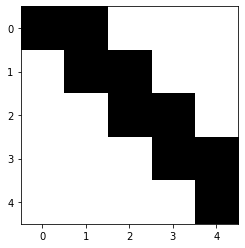

In [30]:
prueba1=plt.imread("pruebasi.png")
plt.imshow(prueba1, cmap='Greys',
interpolation='None')

In [32]:
aux=[]
for i in range(5):
    for j in range(5):
        if list(prueba1[i][j]) == [0,0,0]:
            aux.append(0)
        else:
            aux.append(1)
prueba1=aux
salida1=n.prob(prueba1)
etiq1=numpy.argmax(salida1)
if(etiq1==1):
    print("Si es una escalera")
else:
    print("No es una escalera")

Si es una escalera


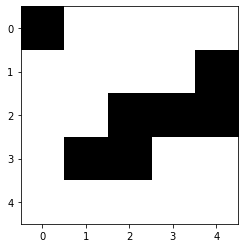

In [74]:
prueba2=plt.imread("pruebano.png")
plt.imshow(prueba2, cmap='Greys',
interpolation='None')

In [75]:
aux=[]
for i in range(5):
    for j in range(5):
        if list(prueba2[i][j]) == [0,0,0]:
            aux.append(0)
        else:
            aux.append(1)
prueba2=aux
salida2=n.prob(prueba2)
etiq2=numpy.argmax(salida2)
if(etiq2==1):
    print("Si es una escalera")
else:
    print("No es una escalera")

No es una escalera
